In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio

In [2]:
local_now = ugradio.timing.local_time() # current local time as a string
ut_now = ugradio.timing.utc() # current UTC as a string
ut_now = ugradio.timing.unix_time() # seconds since 1 January 1970
julian_now = ugradio.timing.julian_date() # current julian day (which \
#contains the current time, too--it’s not just an integer \number.
lst_now = ugradio.timing.lst() # current LST at NCH
lst_julian = ugradio.timing.lst() # LST for the specified Julian day
ut_julian = ugradio.timing.unix_time() # seconds since 1/1/1970 for given JD
julian_ut = ugradio.timing.julian_date() # julian day for given unix time

In [3]:
#data_1000 = ugradio.pico.capture_data('50mV',divisor=1, dual_mode=True, nblocks=1000)

In [18]:
#np.savez('data_1000.npz',data_1000)

In [6]:
data_1000 = np.load('../Data/data_1000.npz')['arr_0'][0][0]

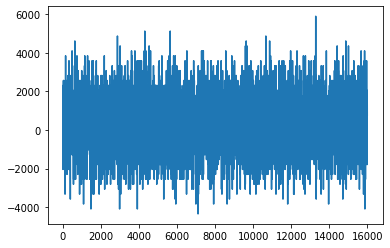

In [8]:
plt.plot(data_1000)

In [9]:
hist = np.histogram(data_1000)

In [10]:
hist[0:10]

(array([  30,  307, 1283, 3204, 4721, 3794, 2037,  543,   73,    8]),
 array([-4352., -3328., -2304., -1280.,  -256.,   768.,  1792.,  2816.,
         3840.,  4864.,  5888.]))

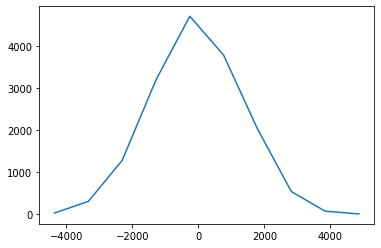

In [11]:
plt.plot(hist[1][:10], hist[0])

In [12]:
freq = np.fft.fftfreq(16000, 1/62.5e6)/(1e6)
freq_shift = np.fft.fftshift(freq)

In [14]:
ft = np.fft.fft(data_1000)
power = abs(ft)**2
power_shift = np.fft.fftshift(power)

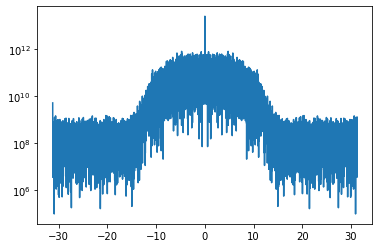

In [15]:
plt.semilogy(freq_shift, power_shift)
#needs to be averaged

In [17]:
blocks = 100
avg = []
for n in range (0,blocks):
    data_new = np.load('../Data/data_1000.npz')['arr_0'][0][n]
    avg.append(data_new)
    
avg_array = np.mean(avg, axis=0)

In [ ]:
ft_avg = np.fft.fft(avg_array)
power_avg = abs(ft_avg)**2
power_shift_avg = np.fft.fftshift(power_avg)
plt.semilogy(freq_shift, power_shift_avg)